# Bull call spread

call option 을 사고 동시에 더 높은 행사가의 call option 을 파는 전략.

이 전략의 목적은 주식의 작은 상승에서 이익을 얻는 것이다. 만기일 주가가 높은 행사가 이상으로 오르면 전략 성공

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def call_payoff(sT, strike_price, premium, contracts=1, multiplier=1):
    price = sT - strike_price
    pnl = np.where(sT > strike_price, price, 0) - premium
    return pnl * contracts * multiplier

def put_payoff(sT, strike_price, premium, contracts=1, multiplier=1):
    pnl = np.where(sT < strike_price, strike_price - sT, 0) - premium
    return pnl * contracts * multiplier

In [4]:
# 현물 가격
spot_price = 900 

# Long call : 콜옵션 구입
strike_price_long_call = 920 
premium_long_call = 15

# Short call : 같은 만기일 더 높은 행사가의 콜옵션 매도
strike_price_short_call = 940 
premium_short_call = 10

# 만기일 주가
sT_expiry = [np.int(strike_price_long_call * 0.9), strike_price_long_call, 
             np.int((strike_price_long_call + strike_price_short_call)/2), 
             strike_price_short_call, np.int(strike_price_short_call * 1.1)]

print('Bull Call Spread 손익\n')
print('낮은행사가의 콜 구입 :', strike_price_long_call)
print('높은행사가의 콜 매도 :', strike_price_short_call)
print('만기일주가, 손익')

for sT in sT_expiry:
    payoff_long_call = call_payoff(sT, strike_price_long_call, premium_long_call)
    payoff_short_call = -call_payoff(sT, strike_price_short_call, premium_short_call)
    payoff_bull_call_spread = payoff_long_call + payoff_short_call
    print('  ', sT, '  ', payoff_bull_call_spread)

Bull Call Spread 손익

낮은행사가의 콜 구입 : 920
높은행사가의 콜 매도 : 940
만기일주가, 손익
   828    -5
   920    -5
   930    5
   940    15
   1034    15


Max Profit : 15.0
Max Loss : -5.0


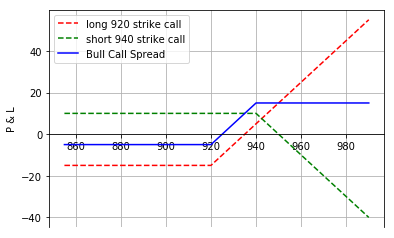

In [56]:
# 만기일 주가 범위
sT = np.arange(0.95*spot_price,1.1*spot_price,1) 

payoff_long_call = call_payoff(sT, strike_price_long_call, premium_long_call)
payoff_short_call = -call_payoff(sT, strike_price_short_call, premium_short_call)
payoff_bull_call_spread = payoff_long_call + payoff_short_call

fig, ax = plt.subplots()
ax.spines["bottom"].set_position("zero")
ax.plot(sT, payoff_long_call,'--', color='r', 
            label="long "+str(strike_price_long_call)+" strike call")
ax.plot(sT, payoff_short_call,'--',color='g', 
            label="short "+str(strike_price_short_call)+" strike call")
ax.plot(sT, payoff_bull_call_spread, 'b-', label="Bull Call Spread")
ax.grid(True)
plt.legend()
plt.ylabel('P & L')
print("Max Profit :", max(payoff_bull_call_spread))
print("Max Loss :", min(payoff_bull_call_spread))

최대수익과 최대 손실이 모두 제한되며, 약간의 강세장이 예상될 때의 투자 전략.

# Bear Put spread

Bear put spread 전략은 풋옵션을 매수하고 동시에 더 낮은 행사가의 풋옵션을 매도하여 성립된다.

전략의 목표는 주가의 작은 하락에서 이익을 얻는 것이다. 

In [67]:
# 현물 가격
spot_price = 900 

# Long call : 풋옵션 구입
strike_price_long_put = 880 
premium_long_put = 15

# Short call : 같은 만기일 더 낮은 행사가의 풋옵션 매도
strike_price_short_put = 860
premium_short_put = 10

# 만기일 주가
sT_expiry = [np.int(strike_price_long_put * 1.1), strike_price_long_put, 
             np.int((strike_price_long_put + strike_price_short_put)/2), 
             strike_price_short_put, np.int(strike_price_short_put * 0.9)]

print('Bear Put Spread 손익\n')
print('높은행사가의 풋 구입 :', strike_price_long_put)
print('낮은행사가의 풋 매도 :', strike_price_short_put)
print('만기일주가, 손익')

for sT in sT_expiry:
    payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)
    payoff_short_put = - put_payoff(sT, strike_price_short_put, premium_short_put)
    payoff_bear_put_spread = payoff_long_put + payoff_short_put
    print('  ', sT, '  ', payoff_bear_put_spread)

Bear Put Spread 손익

높은행사가의 풋 구입 : 880
낮은행사가의 풋 매도 : 860
만기일주가, 손익
   968    -5
   880    -5
   870    5
   860    15
   774    15


Max Profit : 15.0
Max Loss : -5.0


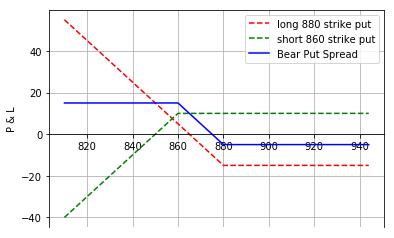

In [68]:
# Stock price range at expiration of the call
sT = np.arange(0.9*spot_price,1.05*spot_price,1) 

payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)
payoff_short_put = - put_payoff(sT, strike_price_short_put, premium_short_put)
payoff_bear_put_spread = payoff_long_put + payoff_short_put

fig, ax = plt.subplots()
ax.spines["bottom"].set_position("zero")
ax.plot(sT, payoff_long_put, 'r--', 
        label="long "+str(strike_price_long_put)+" strike put")

ax.plot(sT, payoff_short_put, 'g--', 
        label="short "+str(strike_price_short_put)+" strike put")

ax.plot(sT, payoff_bear_put_spread, 'b-', label="Bear Put Spread")
plt.grid(True)
plt.ylabel('P & L')
plt.legend()
print("Max Profit :", max(payoff_bear_put_spread))
print("Max Loss :", min(payoff_bear_put_spread))

최대수익과 최대 손실이 모두 제한되며, 약간의 약세장이 예상될 때의 투자 전략.

# Protective Put

Protective Put 은 주식을 사고 동시에 풋옵션을 사는 것이다.

전략의 목표는 역방향의 주가 움직임에서 보호하는 것이다.

In [69]:
# A 종목 매수가
spot_price = 700 

# A 종목의 매수가와 동일한 strike price(ATM) 의 풋옵션 매수
strike_price_long_put = 700
premium_long_put = 20

# 만기일 주가
sT_expiry = [np.int(spot_price * 1.5), np.int(spot_price * 1.1),
             spot_price, np.int(spot_price * 0.9)]

print('Protective Put 손익\n')
print('주식 매수가 :', spot_price)
print('풋옵션 매수 :', strike_price_long_put)
print('만기일주가, 손익')

for sT in sT_expiry:
    payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)
    payoff_stock_A = sT - spot_price
    payoff_protective_put = payoff_long_put + payoff_stock_A
    print('  ', sT, '  ', payoff_protective_put)

Protective Put 손익

주식 매수가 : 700
풋옵션 매수 : 700
만기일주가, 손익
   1050    330
   770    50
   700    -20
   630    -20


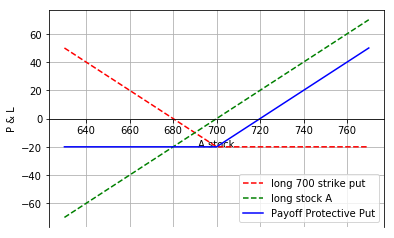

In [70]:
# 풋옵션 만기일의 주가 예상 범위
sT = np.arange(0.9*spot_price,1.1*spot_price,1) 

payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)
payoff_stock_A = sT - spot_price
payoff_protective_put = payoff_long_put + payoff_stock_A

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT, payoff_long_put, 'r--', 
        label="long "+str(strike_price_long_put)+" strike put")
ax.plot(sT, payoff_stock_A, 'g--', label="long stock A")
ax.plot(sT, payoff_protective_put, 'b-', label="Payoff Protective Put")
plt.grid(True)
plt.legend()
plt.xlabel('A stock')
plt.ylabel('P & L');

주가가 700 아래로 떨어질 경우 최대 손실은 프리미엄 지불 가격인 20 으로 제한되고, 700 이상으로 오르면 가격 상승에 비례하여 수익은 커진다.

# Covered Call strategy

Covered call 은 주식을 매수하고 동시에 콜옵션을 매도하는 것이다.

이 전략은 주식이 오르지도 내리지도 않을 것 같을 때 사용한다. 

In [71]:
# A 종목 매수가
spot_price = 300 

# A 종목의 매수가와 동일한 strike price (ATM) 콜옵션 매도 
strike_price_short_call = 300
premium_short_call = 10

# 만기일 주가
sT_expiry = [np.int(spot_price * 1.5), np.int(spot_price * 1.1),
             spot_price, np.int(spot_price * 0.9), np.int(spot_price * 0.5)]

print('Covered Call 손익\n')
print('주식 매수가 :', spot_price)
print('콜옵션 매도 :', strike_price_short_call)
print('만기일주가, 손익')

for sT in sT_expiry:
    payoff_short_call = -1 * call_payoff(sT, strike_price_short_call, premium_short_call)
    payoff_stock_A = sT - spot_price
    payoff_covered_call = payoff_short_call + payoff_stock_A
    print('  ', sT, '  ', payoff_covered_call)

Covered Call 손익

주식 매수가 : 300
콜옵션 매도 : 300
만기일주가, 손익
   450    10
   330    10
   300    10
   270    -20
   150    -140


Text(0,0.5,'P & L')

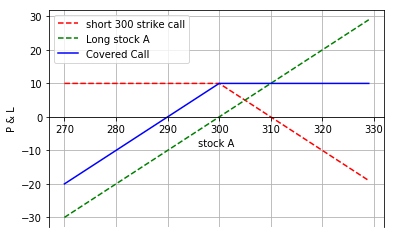

In [72]:
# Stock price range at expiration of the call
sT = np.arange(0.9*spot_price,1.1*spot_price,1) 

payoff_short_call = -1 * call_payoff(sT, strike_price_short_call, premium_short_call)
payoff_stock_A = sT - spot_price
payoff_covered_call = payoff_short_call + payoff_stock_A

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT, payoff_short_call, 'r--', 
        label="short "+str(strike_price_short_call)+" strike call")
ax.plot(sT, payoff_stock_A, 'g--', label='Long stock A')
ax.plot(sT, payoff_covered_call, 'b-', label='Covered Call')
plt.legend()
plt.grid(True)
plt.xlabel('stock A')
plt.ylabel('P & L')

A 주가가 300 이상의 어느 가격이 되더라도 최대 수익은 옵션 프리미엄인 10 으로 제한되고 주가가 300 아래로 떨어지면 최대 손식은 가격 하락에 비례한다.

# Straddle

동일행사가, 동일만기의 put, call option 모두를 premium 지불하고 long position 취함.

주가가 strike price 보다 많이 변동하면 이익. 변하지 않으면 손실

In [12]:
## A 종목을 기초자산으로하는 strike price (ATM) 콜옵션 매수
strike_price_long_call = 292.5
premium_long_call = 2.28
long_call_contracts = 3

# A 종목을 기초자산으로하는 동일한 strike price (ATM) 풋옵션 매수
strike_price_long_put = 285.0
premium_long_put = 2.40
long_put_contracts = 3

# 만기일 주가
sT_expiry = [np.int(strike_price_long_call * 1.1), np.int(strike_price_long_call * 1.05), strike_price_long_call, 
             strike_price_long_put, np.int(strike_price_long_put * 0.95), np.int(strike_price_long_put * 0.9)]

print('Straddle 손익\n')
print('콜옵션 매수 :', strike_price_long_call)
print('풋옵션 매수 :', strike_price_long_put)
print('만기일주가, 손익')

for sT in sT_expiry:
    payoff_long_call = call_payoff(sT, strike_price_long_call, premium_long_call)
    payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)
    payoff_straddle =  payoff_long_call + payoff_long_put 
    print('  ', sT, '  ', payoff_straddle)

Straddle 손익

콜옵션 매수 : 292.5
풋옵션 매수 : 285.0
만기일주가, 손익
   321    23.82
   307    9.82
   292.5    -4.68
   285.0    -4.68
   270    10.32
   256    24.32


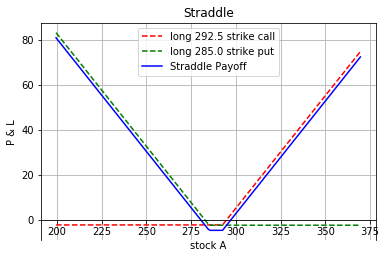

In [13]:
# Stock price range at expiration of the call
sT = np.arange(0.7*strike_price_long_put,1.3*strike_price_long_put,1) 

payoff_long_call = call_payoff(sT, strike_price_long_call, premium_long_call)
payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)
payoff_straddle = payoff_long_call + payoff_long_put

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_long_call, 'r--', 
        label="long "+str(strike_price_long_call)+" strike call")
ax.plot(sT,payoff_long_put, 'g--', 
        label="long "+str(strike_price_long_put)+" strike put")
ax.plot(sT, payoff_straddle , 'b-', label='Straddle Payoff')
plt.legend()
plt.grid(True)
plt.xlabel('stock A')
plt.ylabel('P & L')
plt.title('Straddle');

# Strangle

동일기초자산, 동일 만기의 서로 다른 행가가격의 call 과 put 을 position 으로 보유

## Long Strangle

In [75]:
# A 종목을 기초자산으로 하는 call option 매수
strike_price_long_call = 300
premium_long_call = 10

# A 종목을 기초자산으로하는 동일  만기의 풋옵션 매수
strike_price_long_put = 280
premium_long_put = 15

# 만기일 주가
sT_expiry = [np.int(strike_price_long_call * 1.5), np.int(strike_price_long_call * 1.1), np.int(strike_price_long_call * 1.05),
             spot_price, np.int(strike_price_long_put * 0.95), np.int(strike_price_long_put * 0.9), np.int(strike_price_long_put * 0.8)]

print('Long Strangle 손익\n')
print('콜옵션 매수 :', strike_price_long_call)
print('풋옵션 매수 :', strike_price_long_put)
print('만기일주가, 손익')

for sT in sT_expiry:
    payoff_long_call = call_payoff(sT, strike_price_long_call, premium_long_call)
    payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)
    payoff_strangle =  payoff_long_call + payoff_long_put 
    print('  ', sT, '  ', payoff_strangle)

Long Strangle 손익

콜옵션 매수 : 300
풋옵션 매수 : 280
만기일주가, 손익
   450    125
   330    5
   315    -10
   300    -25
   266    -11
   252    3
   224    31


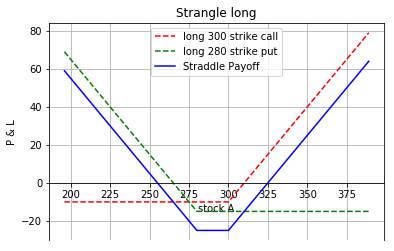

In [76]:
# Stock price range at expiration of the call
sT = np.arange(0.7*strike_price_long_put,1.3*strike_price_long_call,1) 

payoff_long_call = call_payoff(sT, strike_price_long_call, premium_long_call)
payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)
payoff_straddle = payoff_long_call + payoff_long_put

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_long_call, 'r--', 
        label="long "+str(strike_price_long_call)+" strike call")
ax.plot(sT,payoff_long_put, 'g--', 
        label="long "+str(strike_price_long_put)+" strike put")
ax.plot(sT, payoff_straddle , 'b-', label='Straddle Payoff')
plt.legend()
plt.grid(True)
plt.xlabel('stock A')
plt.ylabel('P & L')
plt.title('Strangle long');

## Short Strangle

만기시 주가가 call 행사가보다 낮고 put 행사가보다 높아야 한다. 예측이 빗나가면 손실은 무한대가 된다.

In [77]:
# A 종목을 기초자산으로 하는 call option 매도
strike_price_short_call = 300
premium_short_call = 10

# A 종목을 기초자산으로하는 동일  만기의 풋옵션 매도
strike_price_short_put = 280
premium_short_put = 15

# 만기일 주가
sT_expiry = [np.int(strike_price_short_call * 1.5), np.int(strike_price_short_call * 1.1), np.int(strike_price_short_call * 1.05),
             spot_price, np.int(strike_price_short_put * 0.95), np.int(strike_price_short_put * 0.9), np.int(strike_price_short_put * 0.8)]

print('Long Strangle 손익\n')
print('콜옵션 매수 :', strike_price_short_call)
print('풋옵션 매수 :', strike_price_short_put)
print('만기일주가, 손익')

for sT in sT_expiry:
    payoff_short_call = -call_payoff(sT, strike_price_short_call, premium_short_call)
    payoff_short_put = -put_payoff(sT, strike_price_short_put, premium_short_put)
    payoff_strangle =  payoff_short_call + payoff_short_put 
    print('  ', sT, '  ', payoff_strangle)

Long Strangle 손익

콜옵션 매수 : 300
풋옵션 매수 : 280
만기일주가, 손익
   450    -125
   330    -5
   315    10
   300    25
   266    11
   252    -3
   224    -31


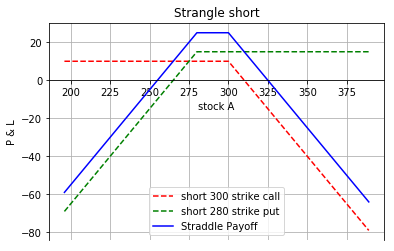

In [78]:
# Stock price range at expiration of the call
sT = np.arange(0.7*strike_price_short_put,1.3*strike_price_short_call,1) 

payoff_short_call = -call_payoff(sT, strike_price_short_call, premium_short_call)
payoff_short_put = -put_payoff(sT, strike_price_short_put, premium_short_put)
payoff_straddle = payoff_short_call + payoff_short_put

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_short_call, 'r--', 
        label="short "+str(strike_price_short_call)+" strike call")
ax.plot(sT,payoff_short_put, 'g--', 
        label="short "+str(strike_price_short_put)+" strike put")
ax.plot(sT, payoff_straddle , 'b-', label='Straddle Payoff')
plt.legend()
plt.grid(True)
plt.xlabel('stock A')
plt.ylabel('P & L')
plt.title('Strangle short');

# Butterfly Spread

4 개의 option 계약으로 구성됨. 동일한 만기일의 3 개의 다른 행사가로 구성.

2 개의 옵션 계약을 중간 행사가로 매도. 1 개의 옵션은 낮은 행사가로 매수. 1 개는 높은 행사가로 매수.

Put 과 Call 모두 사용할 수 있음. 이 전략은 기초자산의 가격이 현재 가격에서 많이 변하지 않을 것이라 예상할 때 실행함.

In [101]:
# A 종목을 기초자산으로 하는 call option 2 계약 매도
strike_price_short_call = 300
premium_short_call = 25

# A 종목을 기초자산으로하는 동일  만기, 낮은 strike 의 콜옵션 1 계약 매수
strike_price_long_call_1 = 260
premium_long_call_1 = 40

# A 종목을 기초자산으로하는 동일  만기, 높은 strike 의 콜옵션 1 계약 매수
strike_price_long_call_2 = 340
premium_long_call_2 = 30

total_premium_recieve = premium_short_call * 2 - premium_long_call_1 - premium_long_call_2

print('Long Strangle 손익\n')
print('콜옵션 2 계약 매도 :', strike_price_short_call)
print('콜옵션 매수 :', strike_price_long_call_1)
print('콜옵션 매수 :', strike_price_long_call_2)
print()
print('Total premium received : ', total_premium_recieve)

Long Strangle 손익

콜옵션 2 계약 매도 : 300
콜옵션 매수 : 260
콜옵션 매수 : 340

Total premium received :  -20


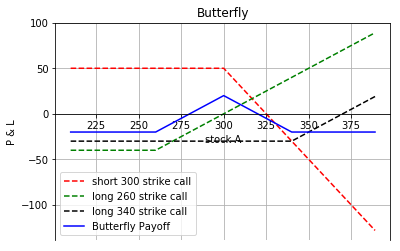

In [102]:
# Stock price range at expiration of the call
sT = np.arange(0.7*strike_price_short_call,1.3*strike_price_short_call, 1) 

payoff_short_call = -call_payoff(sT, strike_price_short_call, premium_short_call, contracts=2)
payoff_long_call_1 = call_payoff(sT, strike_price_long_call_1, premium_long_call_1)
payoff_long_call_2 = call_payoff(sT, strike_price_long_call_2, premium_long_call_2)
payoff_butterfly = payoff_short_call + payoff_long_call_1 + payoff_long_call_2

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_short_call, 'r--', 
        label="short "+str(strike_price_short_call)+" strike call")
ax.plot(sT,payoff_long_call_1, 'g--', 
        label="long "+str(strike_price_long_call_1)+" strike call")
ax.plot(sT,payoff_long_call_2, 'k--', 
        label="long "+str(strike_price_long_call_2)+" strike call")
ax.plot(sT, payoff_butterfly , 'b-', label='Butterfly Payoff')
plt.legend()
plt.grid(True)
plt.xlabel('stock A')
plt.ylabel('P & L')
plt.title('Butterfly');